This notebooks experiments with the year of the movie release. We analyse the distribution of data and determine the appropriate era information to classify movies. Then the content based approach is used to form a user vector based on the era preference.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ast import literal_eval
import pdb

In [3]:
# Load movies data
md = pd.read_csv("tmdb_movies.csv", converters={"genres": literal_eval})

In [4]:
md.shape

(4803, 20)

In [5]:
# Pre-processing step for getting year from date by splliting it using '-'
md['year'] = pd.to_datetime(md['release_date'], errors='coerce').apply(
    lambda x: str(x).split('-')[0] if x != np.nan else np.nan)

In [6]:
md.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,year
0,237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,2009
1,300000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,2007
2,245000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,2015
3,250000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,2012
4,260000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,2012


(array([1195., 1373.,  909.,  616.,  250.,  111.,  115.,   95.,   42.,
          28.,   18.,   21.,   11.,   10.,    9.]),
 array([ 0.,  6., 12., 18., 24., 30., 36., 42., 48., 54., 60., 66., 72.,
        78., 84., 90.]),
 <BarContainer object of 15 artists>)

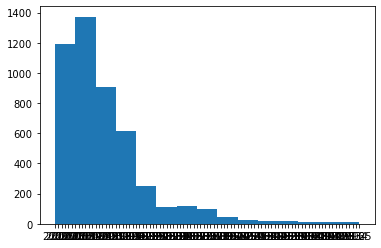

In [7]:
plt.hist(md.year, bins = 15)

In [8]:
md.year.describe()

count     4803
unique      91
top       2009
freq       247
Name: year, dtype: object

In [9]:
mask = md['year'] == 'NaT'
md[md['year'] == 'NaT'].shape

(1, 21)

In [10]:
md_refined = md[~mask]
md_refined.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,year
0,237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,2009
1,300000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,2007
2,245000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,2015
3,250000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,2012
4,260000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,2012


Text(0.5, 1.0, 'Histogram')

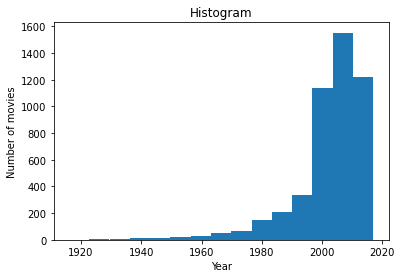

In [11]:
# md['year'].replace({pd.NaT: 0}, inplace=True)
plt.hist(md_refined['year'].astype(int), bins=15)
plt.xlabel('Year')
plt.ylabel('Number of movies')
plt.title('Histogram')

In [12]:
def get_era(x):
    year = int(x['year'])
    era = ''
    if year > 2010:
        era = '10s' 
    elif year >= 2000:
        era = '2000s'
    elif year > 1980: 
        era = '90s'
    else:
        era = 'Old'
    return era

In [13]:
def get_era_vector(x):
    year = int(x['year'])
    era_vector = np.zeros(4)
    if year > 2010:
        era_vector[3] = 1
    elif year >= 2000:
        era_vector[2] = 1
    elif year > 1980: 
        era_vector[1] = 1
    else:
        era_vector[0] = 1
    return era_vector

In [14]:
md_refined['era'] = md_refined.apply(get_era, axis=1)
md_refined['era_vector'] = md_refined.apply(get_era_vector, axis=1)

/Users/drumilved/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/drumilved/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [15]:
md_refined.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,year,era,era_vector
0,237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,2009,2000s,"[0.0, 0.0, 1.0, 0.0]"
1,300000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,2007,2000s,"[0.0, 0.0, 1.0, 0.0]"
2,245000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,2015,10s,"[0.0, 0.0, 0.0, 1.0]"
3,250000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,2012,10s,"[0.0, 0.0, 0.0, 1.0]"
4,260000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,2012,10s,"[0.0, 0.0, 0.0, 1.0]"


In [16]:
# md_refined[['movieId', 'era_vector']].to_csv('movie_era_vector.csv')

In [17]:
md_undef = md[mask]
md_undef.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,year
4553,0,[],NaN,380097,[],en,America Is Still the Place,1971 post civil rights San Francisco seemed li...,0.0,[],...,NaN,0,0.0,[],Released,NaN,America Is Still the Place,0.0,0,NaT


In [18]:
# ## Failed attempt - 1 
# from sklearn.preprocessing import MultiLabelBinarizer
# mlb = MultiLabelBinarizer()
# mlb.fit_transform(md_refined['era'])
# list(mlb.classes_)

In [19]:
# ## Failed attempt - 2
# from sklearn.preprocessing import OneHotEncoder
# ohe = OneHotEncoder()
# ohe.fit(md_refined['era'])

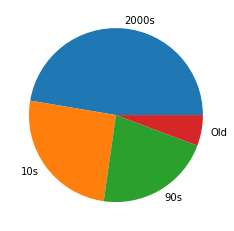

In [20]:
plt.pie(md_refined['era'].value_counts(), labels = md_refined['era'].unique())
plt.show()

## Making user vector for era!

In [30]:
ratings_train = pd.read_csv("training_data.csv", converters={"genres": literal_eval, "tag": literal_eval})

In [31]:
ratings_train.head()

,userId,movieId,rating,timestamp,genres,tag
0,1,47,5.0,964983815,"[Mystery, Thriller]",[]
1,1,50,5.0,964982931,"[Crime, Mystery, Thriller]",[]
2,1,70,3.0,964982400,"[Action, Comedy, Horror, Thriller]",[]
3,1,101,5.0,964980868,"[Adventure, Comedy, Crime, Romance]",[]
4,1,110,4.0,964982176,"[Action, Drama, War]",[]


In [33]:
user_ids = ratings_train['userId'].unique() 
user_df = pd.DataFrame(columns=['userId', 'user_era_vector'])
error_count = 0
for user_id in user_ids:
    user_rating_df = ratings_train[(ratings_train['userId'] == user_id)]
    user_vector = np.zeros(4)
    count_vector = np.zeros(4)
    for _, row in user_rating_df.iterrows():
        if len(md_refined['era_vector'][md_refined['movieId'] == row['movieId']].values):
            user_movie_vector = md_refined['era_vector'][md_refined['movieId'] == row['movieId']].values[0]
            count_vector += user_movie_vector
            user_vector += user_movie_vector*row.rating
        else:
            error_count += 1
            print("No era vector for this movie: ", row['movieId'])
    count_vector = np.where(count_vector==0, 1, count_vector)
    user_vector = np.divide(user_vector, count_vector)
    row_df = pd.DataFrame([[user_id, user_vector]], columns=['userId', 'user_era_vector'])
    user_df = pd.concat([user_df, row_df], ignore_index=True)




KeyError: 'movieId'

In [27]:
error_count

0

In [28]:
user_df.head()

,userId,user_era_vector


In [ ]:
user_df.to_csv("user_era_vector.csv")

In [ ]:
ratings_test = pd.read_csv("testing_data.csv", converters={"genres": literal_eval, "tag": literal_eval}) 
ratings_test.head()

In [ ]:
algo_predictions = pd.DataFrame(columns=['userId', 'movieId', 'user_vector', 'movie_vector', 'og_rating', 'pred_rating'])
error_count = 0
for ind, row in ratings_test.iterrows():
    userId = row['userId']
    movieId = row['movieId']
    og_rating = row['rating']
    
    user_vector = user_df[user_df['userId'] == int(userId)].user_era_vector.values[0]
    if len(md_refined[md_refined['movieId'] == int(movieId)].era_vector.values):
        movie_vector = md_refined[md_refined['movieId'] == int(movieId)].era_vector.values[0]
    else:
        error_count += 1
        print("Movie vector not found!", movieId)
    predicted_rating = user_vector*movie_vector

    if predicted_rating.any():
        predicted_rating = np.nanmean(np.where(predicted_rating!=0, predicted_rating, np.nan))
    else:
        predicted_rating = 0

    row_df = pd.DataFrame([[userId, movieId, user_vector, movie_vector, og_rating, predicted_rating]], 
                columns=['userId', 'movieId', 'user_vector', 'movie_vector', 'og_rating', 'pred_rating'])
    algo_predictions = pd.concat([algo_predictions, row_df], ignore_index=True)

In [ ]:
algo_predictions

In [ ]:
rmse = ((algo_predictions.og_rating - algo_predictions.pred_rating) ** 2).mean() ** .5
rmse

In [ ]:
mae = (((algo_predictions.og_rating - algo_predictions.pred_rating) ** 2) ** .5).mean()
mae

In [ ]:
algo_predictions.to_csv("era_predictions.csv")